In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles 

In [215]:
# Tạo dữ liệu
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5)
y = np.where(y == 0, -1, 1)  # Chuyển 0 -> -1 để phù hợp với SVM

In [216]:
class SVMClassifier:
    def __init__(self, lr: float = 1e-3, bias: bool = True, epsilon: float = 1e-3, C: float = 0.01) -> None:
        self.lr = lr  # Learning rate
        self.bias = bias  # Bias
        self.epsilon = epsilon  # Điều kiện dừng
        self.C = C  # Regularization strength

    def __init_weights(self, shape: tuple[int]) -> None:
        self.theta = np.random.randn(shape[1] + 1, 1) * 0.01
        if not self.bias:
            self.theta[0, 0] = 0

    def fit(self, X: np.ndarray, y: np.ndarray, num_epochs: int = 100, trace: bool = True) -> None:
        shape = X.shape
        X_mapped = np.array([X[:, 0]**2, np.sqrt(2) * X[:, 0] * X[:, 1], X[:, 1]**2]).T
        self.__init_weights((shape[0], X_mapped.shape[1]))

        X_mapped = np.hstack((np.ones((shape[0], 1)), X_mapped))  # Bias term
        for epoch in range(num_epochs):
            loss = 0
            for i in range(len(y)):
                margin = y[i] * (X_mapped[i] @ self.theta)
                if margin < 1:  # Hinge loss condition
                    loss += 1 - margin
                    self.theta += self.lr * (y[i] * X_mapped[i].reshape(-1, 1) - self.C * self.theta)
                else:
                    self.theta *= (1 - self.lr * self.C)  # Regularization shrinkage
            
            if trace:
                print(f"EPOCH {epoch + 1}/{num_epochs} Loss: {loss}")

            if abs(loss) <= self.epsilon:
                print("Early stopping: Loss below threshold.")
                break


In [217]:
svm = SVMClassifier(lr=0.005, bias=True)
X_mapped = np.array([X[:, 0]**2, np.sqrt(2) * X[:, 0] * X[:, 1], X[:, 1]**2]).T
svm.fit(X_mapped, y)

EPOCH 1/100 Loss: [885.71415271]
EPOCH 2/100 Loss: [705.52514905]
EPOCH 3/100 Loss: [581.23097143]
EPOCH 4/100 Loss: [467.13626281]
EPOCH 5/100 Loss: [402.49425716]
EPOCH 6/100 Loss: [372.84390896]
EPOCH 7/100 Loss: [354.1402729]
EPOCH 8/100 Loss: [341.08947457]
EPOCH 9/100 Loss: [331.54707174]
EPOCH 10/100 Loss: [325.49139671]
EPOCH 11/100 Loss: [320.67354711]
EPOCH 12/100 Loss: [316.70554926]
EPOCH 13/100 Loss: [313.53887862]
EPOCH 14/100 Loss: [310.96461887]
EPOCH 15/100 Loss: [308.57449346]
EPOCH 16/100 Loss: [306.52791466]
EPOCH 17/100 Loss: [304.6255898]
EPOCH 18/100 Loss: [302.78614548]
EPOCH 19/100 Loss: [301.47708459]
EPOCH 20/100 Loss: [300.28457571]
EPOCH 21/100 Loss: [299.30256614]
EPOCH 22/100 Loss: [298.51255037]
EPOCH 23/100 Loss: [297.79029329]
EPOCH 24/100 Loss: [297.23027038]
EPOCH 25/100 Loss: [296.73898084]
EPOCH 26/100 Loss: [296.24150755]
EPOCH 27/100 Loss: [295.6948909]
EPOCH 28/100 Loss: [295.30339219]
EPOCH 29/100 Loss: [295.0192737]
EPOCH 30/100 Loss: [294.724

Theta:  [[ 1.11794273]
 [-2.17997397]
 [-0.06047916]
 [-3.96309966]]


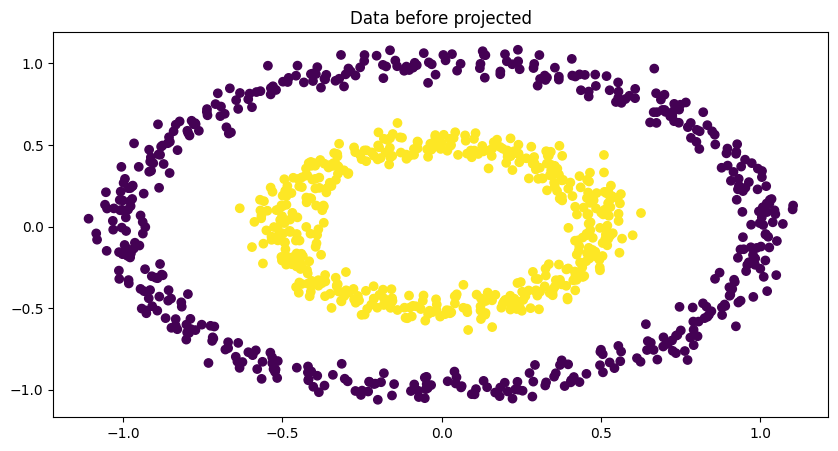

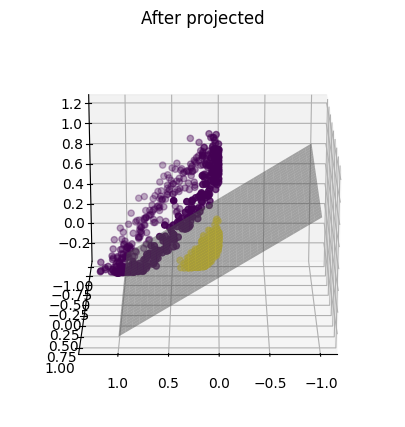

In [218]:
theta = svm.theta
print("Theta: ", theta)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot()
ax1.scatter(X[:, 0], X[:, 1], c=y)
ax1.set_title("Data before projected")

fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(projection='3d')

ax2.scatter(X_mapped[:, 0], X_mapped[:, 1], X_mapped[:, 2], c=y)
ax2.set_title("After projected")

X_axis, Y_axis = np.meshgrid(np.linspace(-1, 1, 30), np.linspace(-1, 1, 30))
if theta[3] != 0:
    Z_axis = -(theta[0] + theta[1] * X_axis + theta[2] * Y_axis) / theta[3]
    ax2.plot_surface(X_axis, Y_axis, Z_axis, alpha=0.5, color='gray')

ax2.view_init(elev=20, azim=90, roll=0)
plt.show()